In [5]:
# Basic settings for pyspark.
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Iteration4_misl938').getOrCreate()

In [6]:
# Import the relevant Python libraries.
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# Let's read in the data.
#housing_data = spark.read.csv('Datasets/Melbourne_housing.csv', inferSchema= True, header = True)
housing_data = spark.read.csv('Datasets/Melbourne_housing.csv', header = True)

In [65]:
# The show method allows us to visualise DataFrames.
housing_data.show()


+----------+-------------------+-----+----+-------+------+-------+---------+--------+--------+--------+--------+----+--------+------------+---------+------------------+---------+----------+--------------------+-------------+
|    Suburb|            Address|Rooms|Type|  Price|Method|SellerG|     Date|Distance|Postcode|Bedroom2|Bathroom| Car|Landsize|BuildingArea|YearBuilt|       CouncilArea|Lattitude|Longtitude|          Regionname|Propertycount|
+----------+-------------------+-----+----+-------+------+-------+---------+--------+--------+--------+--------+----+--------+------------+---------+------------------+---------+----------+--------------------+-------------+
|Abbotsford|      68 Studley St|    2|   h|   null|    SS| Jellis|3/09/2016|     2.5|    3067|       2|       1|   1|     126|        null|     null|Yarra City Council| -37.8014|  144.9958|Northern Metropol...|         4019|
|Abbotsford|       85 Turner St|    2|   h|1480000|     S| Biggin|3/12/2016|     2.5|    3067|      

In [5]:
# Let's have a better view of the 20 rows of dataset
housing_data.limit(20).toPandas()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,None,SS,Jellis,3/09/2016,2.5,3067,...,1,1,126,None,None,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019
1,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,3/12/2016,2.5,3067,...,1,1,202,None,None,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019
2,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,4/02/2016,2.5,3067,...,1,0,156,79,1900,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019
3,Abbotsford,18/659 Victoria St,3,u,None,VB,Rounds,4/02/2016,2.5,3067,...,2,1,0,None,None,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019
4,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,4/03/2017,2.5,3067,...,2,0,134,150,1900,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019
5,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,4/03/2017,2.5,3067,...,2,1,94,None,None,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019
6,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,4/06/2016,2.5,3067,...,1,2,120,142,2014,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019
7,Abbotsford,16 Maugie St,4,h,None,SN,Nelson,6/08/2016,2.5,3067,...,2,2,400,220,2006,Yarra City Council,-37.7965,144.9965,Northern Metropolitan,4019
8,Abbotsford,53 Turner St,2,h,None,S,Biggin,6/08/2016,2.5,3067,...,1,2,201,None,1900,Yarra City Council,-37.7995,144.9974,Northern Metropolitan,4019
9,Abbotsford,99 Turner St,2,h,None,S,Collins,6/08/2016,2.5,3067,...,2,1,202,None,1900,Yarra City Council,-37.7996,144.9989,Northern Metropolitan,4019


In [66]:
# Let's have a look at the column names. 
housing_data.columns


['Suburb',
 'Address',
 'Rooms',
 'Type',
 'Price',
 'Method',
 'SellerG',
 'Date',
 'Distance',
 'Postcode',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'CouncilArea',
 'Lattitude',
 'Longtitude',
 'Regionname',
 'Propertycount']

In [67]:
# number of rows/entry in the dataset
housing_data.count()

34857

TypeError: boxplot() got an unexpected keyword argument 'y'

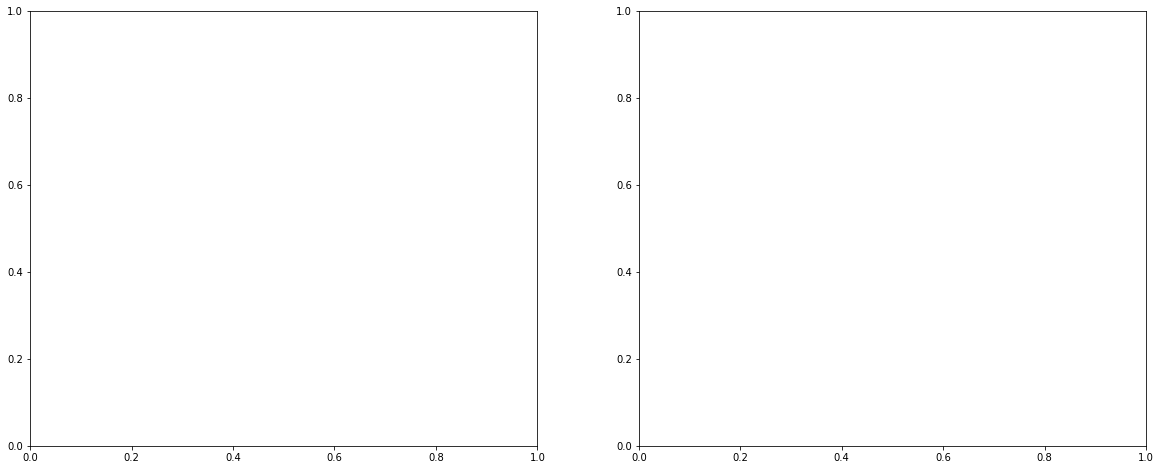

In [10]:
# categorical features v price

f, axes = plt.subplots(1,2, figsize = (20,8))
#labels=(housing_data['Regionname'].unique()).tolist()



# Plot [0]
plt.boxplot( x = 'Type', y = 'Price',data = housing_data.toPandas(), ax = axes[0])
#axes[0].set_xlabel('Type')
#axes[0].set_ylabel('Price')
#axes[0].set_title('Type v Price')

# Plot [1]
plt.boxplot(x = 'Regionname', y = 'Price', data = housing_data.toPandas(), ax = axes[1])
#axes[1].set_xticklabels(labels, rotation=80)
#axes[1].set_xlabel('Region Name')
#axes[1].set_ylabel('Price')
#axes[1].set_title('Region Name v Price')


plt.show()

In [14]:
# We can use the describe method to get some general statistics on our data. 
housing_data.describe().toPandas()

,summary,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,count,34857,34857,34857,34857,27247,34857,34857,34857,34856,...,26631,26129,23047,13742,15551,34854,26881,26881,34854,34854
1,mean,None,None,3.0310124221820582,None,1050173.344955408,None,None,None,11.184929423916575,...,1.624798167549097,1.7288453442535114,593.598993361392,160.2564003565711,1965.289884894862,None,-37.810634295599094,145.00185113165475,None,7572.8883055029555
2,stddev,None,None,0.9699329348975181,None,641467.1301046003,None,None,None,6.788892455935919,...,0.7242120114699053,1.0107707853554255,3398.8419464599056,401.26706008485513,37.328178023136594,None,0.09027890450922157,0.12016876915353364,None,4428.090313274634
3,min,Abbotsford,1 Abercrombie St,1,h,1000000,PI,@Realty,1/07/2017,0,...,0,0,0,0,1196,Banyule City Council,-37.3902,144.42379,Eastern Metropolitan,1008
4,max,viewbank,9b Stewart St,9,u,999999,W,voglwalpole,9/12/2017,9.9,...,9,9,999,999,2106,Yarra Ranges Shire Council,-38.19043,145.52635,Western Victoria,984


In [34]:
# entries with 0 building area
housing_data.filter(housing_data.BuildingArea=='0').count()

76

In [35]:
# number houses was built before 1835
housing_data.filter(housing_data.YearBuilt < '1835' ).count()

4

In [42]:
#houses was built before 1835
housing_data.filter(housing_data.YearBuilt < '1835' ).toPandas()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Collingwood,2/79 Oxford St,2,u,855000,S,Nelson,3/09/2016,1.6,3066,...,1,1,2886,122,1830,Yarra City Council,-37.8042,144.9845,Northern Metropolitan,4553
1,South Melbourne,403 Park St,3,h,None,SP,Cayzer,20/05/2017,2.1,3205,...,2,0,104,125,1800,Port Phillip City Council,-37.838,144.9525,Southern Metropolitan,5943
2,Mount Waverley,5 Armstrong St,3,h,1200000,VB,McGrath,24/06/2017,14.2,3149,...,1,4,807,117,1196,Monash City Council,-37.86788,145.12121,Eastern Metropolitan,13366
3,Carlton North,146 Pigdon St,2,u,720000,S,Jellis,28/10/2017,3.5,3054,...,1,None,None,64,1820,Melbourne City Council,-37.78188,144.97227,Northern Metropolitan,3106


In [39]:
# number houses was built after 2018
housing_data.filter(housing_data.YearBuilt > '2018' ).count()

2

In [43]:
# houses was built after 2018
housing_data.filter(housing_data.YearBuilt > '2018' ).toPandas()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Bulleen,3 Maringa St,4,h,None,SP,Ray,7/11/2016,11.8,3105,...,2,2,729,255,2106,Manningham City Council,-37.7637,145.0881,Eastern Metropolitan,4480
1,Bentleigh,1 Wyuna Ct,3,h,1100000,VB,Woodards,17/03/2018,11.4,3204,...,1,4,635,242,2019,Glen Eira City Council,-37.92963,145.03666,Southern Metropolitan,6795


In [15]:
# For type, we can use print schema. 
housing_data.printSchema()


root
 |-- Suburb: string (nullable = true)
 |-- Address: string (nullable = true)
 |-- Rooms: string (nullable = true)
 |-- Type: string (nullable = true)
 |-- Price: string (nullable = true)
 |-- Method: string (nullable = true)
 |-- SellerG: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Distance: string (nullable = true)
 |-- Postcode: string (nullable = true)
 |-- Bedroom2: string (nullable = true)
 |-- Bathroom: string (nullable = true)
 |-- Car: string (nullable = true)
 |-- Landsize: string (nullable = true)
 |-- BuildingArea: string (nullable = true)
 |-- YearBuilt: string (nullable = true)
 |-- CouncilArea: string (nullable = true)
 |-- Lattitude: string (nullable = true)
 |-- Longtitude: string (nullable = true)
 |-- Regionname: string (nullable = true)
 |-- Propertycount: string (nullable = true)



In [17]:
# Let's import in the relevant types.
from pyspark.sql.types import (StructField,StringType,IntegerType,DateType,ShortType,DoubleType,StructType)

In [18]:
# Then create a variable with the correct structure.

data_schema = [StructField('Suburb',StringType(),True),
               StructField('Address',StringType(),True),
               StructField('Rooms',IntegerType(),True),
               StructField('Type',StringType(),True),
               StructField('Price',IntegerType(),True),
               StructField('Method',StringType(),True),
               StructField('SellerG',StringType(),True),
               StructField('Date',DateType(),True),
               StructField('Distance',DoubleType(),True),
               StructField('Postcode',IntegerType(),True),
               StructField('Bedroom2',IntegerType(),True),            
               StructField('Bathroom',IntegerType(),True),
               StructField('Car',IntegerType(),True),
               StructField('Landsize',IntegerType(),True),
               StructField('BuildingArea',DoubleType(),True),
               StructField('YearBuilt',IntegerType(),True),
               StructField('CouncilArea',StringType(),True),
               StructField('Lattitude',DoubleType(),True),
               StructField('Longtitude',DoubleType(),True),      
               StructField('Regionname',StringType(),True),
               StructField('Propertycount',IntegerType(),True)]

final_struct = StructType(fields=data_schema)


In [19]:
# And now we can read in the data using that schema. If we print the schema, we can see that age is now an integer. 

housing_data = spark.read.csv('Datasets/Melbourne_housing.csv', schema=final_struct, header = True)

housing_data.printSchema()


root
 |-- Suburb: string (nullable = true)
 |-- Address: string (nullable = true)
 |-- Rooms: integer (nullable = true)
 |-- Type: string (nullable = true)
 |-- Price: integer (nullable = true)
 |-- Method: string (nullable = true)
 |-- SellerG: string (nullable = true)
 |-- Date: date (nullable = true)
 |-- Distance: double (nullable = true)
 |-- Postcode: integer (nullable = true)
 |-- Bedroom2: integer (nullable = true)
 |-- Bathroom: integer (nullable = true)
 |-- Car: integer (nullable = true)
 |-- Landsize: integer (nullable = true)
 |-- BuildingArea: double (nullable = true)
 |-- YearBuilt: integer (nullable = true)
 |-- CouncilArea: string (nullable = true)
 |-- Lattitude: double (nullable = true)
 |-- Longtitude: double (nullable = true)
 |-- Regionname: string (nullable = true)
 |-- Propertycount: integer (nullable = true)



In [41]:
# to view the selected column(s)
housing_data.select('Rooms','Bedroom2','YearBuilt','Car','Type','BuildingArea','Distance','Landsize','Bathroom','Price').limit(20).toPandas()

,Rooms,Bedroom2,YearBuilt,Car,Type,BuildingArea,Distance,Landsize,Bathroom,Price
0,2,2,None,1,h,None,2.5,126,1,None
1,2,2,None,1,h,None,2.5,202,1,1480000
2,2,2,1900,0,h,79,2.5,156,1,1035000
3,3,3,None,1,u,None,2.5,0,2,None
4,3,3,1900,0,h,150,2.5,134,2,1465000
5,3,3,None,1,h,None,2.5,94,2,850000
6,4,3,2014,2,h,142,2.5,120,1,1600000
7,4,3,2006,2,h,220,2.5,400,2,None
8,2,4,1900,2,h,None,2.5,201,1,None
9,2,3,1900,1,h,None,2.5,202,2,None


In [23]:
# to view statistical information of the selected column(s)
housing_data.describe('Rooms','YearBuilt','BuildingArea','Distance','Landsize','Price').toPandas()

,summary,Rooms,YearBuilt,BuildingArea,Distance,Landsize,Price
0,count,34857,15551,13742,34856,23047,27247
1,mean,3.0310124221820582,1965.289884894862,160.2564003565711,11.184929423916575,593.598993361392,1050173.344955408
2,stddev,0.9699329348975181,37.328178023136594,401.26706008485513,6.788892455935919,3398.8419464599056,641467.1301046003
3,min,1,1196,0.0,0.0,0,85000
4,max,16,2106,44515.0,48.1,433014,11200000


In [4]:
housing_data.head()

Row(Suburb='Abbotsford', Address='68 Studley St', Rooms='2', Type='h', Price=None, Method='SS', SellerG='Jellis', Date='3/09/2016', Distance='2.5', Postcode='3067', Bedroom2='2', Bathroom='1', Car='1', Landsize='126', BuildingArea=None, YearBuilt=None, CouncilArea='Yarra City Council', Lattitude='-37.8014', Longtitude='144.9958', Regionname='Northern Metropolitan', Propertycount='4019')

In [6]:
# A simple for loop allows us to make it even clearer. 
for item in housing_data.head():
    print(item)

Abbotsford
68 Studley St
2
h
None
SS
Jellis
3/09/2016
2.5
3067
2
1
1
126
None
None
Yarra City Council
-37.8014
144.9958
Northern Metropolitan
4019
